# Project 1 - Stroke Risk Predictor Analysis

## 1. Introduction & Goals 
Exploring factors associated with stroke occurence using the Stroke Prediction dataset.

## 2. Data Overview

In [1]:
import pandas as pd

# Loading dataset 
df = pd.read_csv('/Users/harmonyedgley/Downloads/healthcare-dataset-stroke-data.csv')
df.head() # This will provide a preview of the first 5 rows (helping me visually understand)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 3. EDA (Exploratory Data Analysis)

In [5]:
df.shape

(5110, 12)

In [4]:
df.columns # confirms the features present

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
# Check missing values 
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## 4. Data Cleaning Choices

* Fill missing BMI with the median
* Create age bins: 0 - 20, 21 - 40, 41 - 60, 61 - 80, 80+
* Create BMI categories: underweight (< 18.5), normal (18.5 - 24.9), overweight (25 - 29.9), obese (30+)
* Relabel hypertension for easy visualization
* Ignore irrelevant columns (id, ever_married, work_type)
* Do not touch smoking_status (not used in my analysis)


In [48]:
# Reload Dataset:
df = pd.read_csv('/Users/harmonyedgley/Downloads/healthcare-dataset-stroke-data.csv')

## 4.1 Data Cleaning 

## Cleaning Step 1: Impute Missing BMI

In [49]:
median_bmi = df['bmi'].median()
df['bmi'] = df['bmi'].fillna(median_bmi)

# Verify
print(df.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


## Cleaning Step 2: Create Age Bins

In [50]:
import numpy as np

bins = [0, 20, 40, 60, 80, 81]
labels = ['Children & Teens', 'Young Adult', 'Middle-aged Adult', 'Older Adult', 'Elderly']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

df['age_group'].value_counts()

age_group
Middle-aged Adult    1562
Young Adult          1219
Older Adult          1188
Children & Teens     1025
Elderly                60
Name: count, dtype: int64

## Cleaning Step 3: Create BMI Categories

In [51]:
bins = [-np.inf, 18.5, 24.9, 29.9, np.inf]

labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels)

df['bmi_category'].value_counts()

bmi_category
Obese          1920
Overweight     1610
Normal         1231
Underweight     349
Name: count, dtype: int64

## Cleaning Step 4: Relabel Hypertension

In [52]:
df['hypertension_label'] = df['hypertension'].map({
    0: 'No Hypertension',
    1: 'Hypertension'
})

df[['hypertension', 'hypertension_label']].head()

,hypertension,hypertension_label
0,0,No Hypertension
1,0,No Hypertension
2,0,No Hypertension
3,0,No Hypertension
4,1,Hypertension


## Cleaning Step 5: Drop Irrelevant Columns

In [53]:
df = df.drop(columns=['id', 'ever_married', 'work_type', 'Residence_type'])

## 5. Visualizations

## Gender vs. Stroke

In [61]:
import matplotlib.pyplot as plt

# Count how many stroke vs no-stroke per gender
gender_counts = df.groupby(['gender', 'stroke']).size().unstack()

gender_counts.columns = ['No Stroke', 'Stroke']

gender_counts 


,No Stroke,Stroke
gender,,
Female,2853.0,141.0
Male,2007.0,108.0
Other,1.0,NaN


In [62]:
# Convert to percentages

gender_percent = gender_counts.div(gender_counts.sum(axis=1), axis=0)
gender_percent

,No Stroke,Stroke
gender,,
Female,0.952906,0.047094
Male,0.948936,0.051064
Other,1.000000,NaN


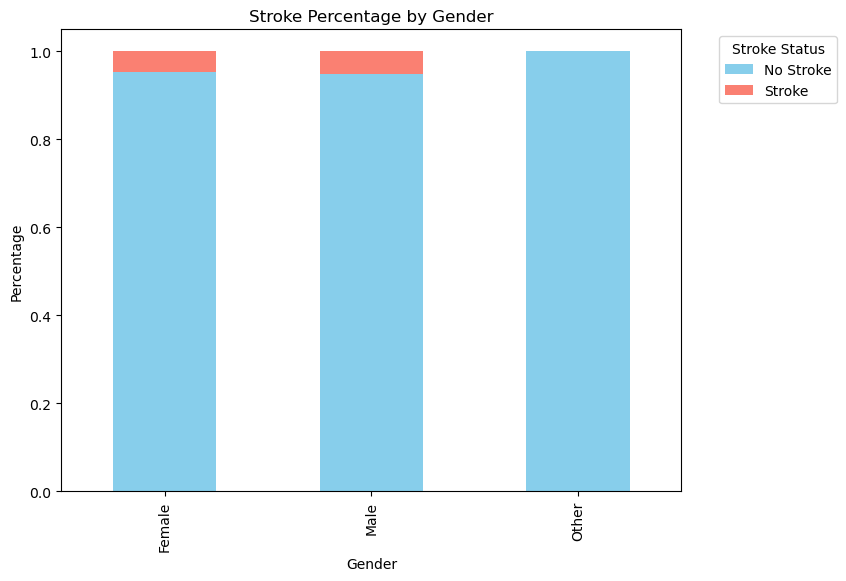

In [63]:
gender_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(8,6),
    color=['skyblue', 'salmon']
)

plt.title("Stroke Percentage by Gender")
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.legend(title="Stroke Status", bbox_to_anchor=(1.05, 1))
plt.show()

## BMI Category vs. Stroke

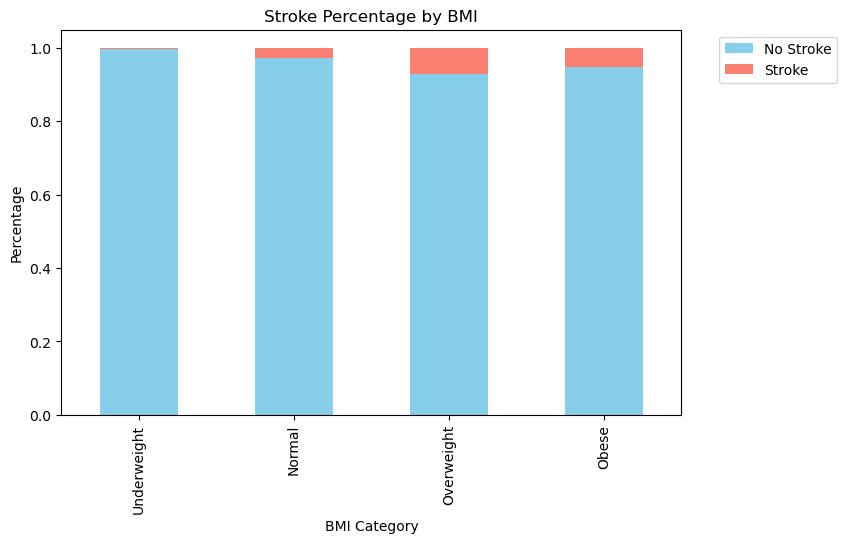

In [68]:
bmi_stroke = df.groupby(['bmi_category', 'stroke'], observed=True).size().unstack()

# Convert to percentages
bmi_percent = bmi_stroke.div(bmi_stroke.sum(axis=1), axis=0)

# Plot
bmi_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    color=['skyblue', 'salmon']
)

plt.title("Stroke Percentage by BMI")
plt.xlabel("BMI Category")
plt.ylabel("Percentage")
plt.legend(['No Stroke', 'Stroke'], bbox_to_anchor=(1.05, 1))
plt.show()

## Hypertension vs. Stroke 

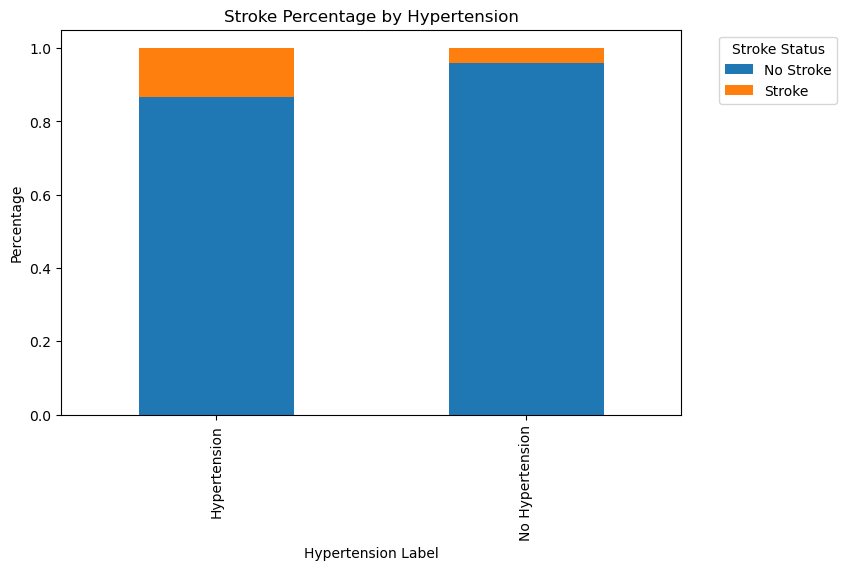

In [71]:
hypertension_stroke = df.groupby(['hypertension_label', 'stroke'], observed=True).size().unstack()

#Convert to percentages
hypertension_percent = hypertension_stroke.div(hypertension_stroke.sum(axis=1), axis=0)

# Plot
hypertension_percent.plot(
    kind='bar',
    stacked='True',
    figsize=(8,5),
    
)

plt.title("Stroke Percentage by Hypertension")
plt.ylabel("Percentage")
plt.xlabel("Hypertension Label")
plt.legend(['No Stroke', 'Stroke'], title="Stroke Status", bbox_to_anchor=(1.05, 1))
plt.show()

## Age Group vs. Stroke

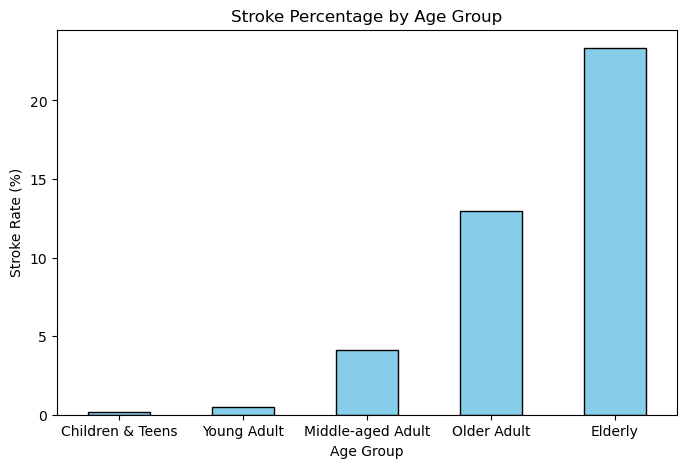

In [73]:
age_stroke = df.groupby('age_group', observed=True)['stroke'].mean() * 100

plt.figure(figsize=(8,5))
age_stroke.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Stroke Percentage by Age Group')
plt.ylabel('Stroke Rate (%)')
plt.xlabel('Age Group')
plt.xticks(rotation=0)

plt.show()

## 6. Key Insights

## Insight 1 - Gender vs Stroke 
- Although there are more females in the dataset, stroke rates between both male and female are extremely similar.
- Based on this data, it suggests that gender is not a strong predictor in potential stroke risk.

## Insight 2 - BMI vs Stroke 
- Based on the dataset, there is a huge risk of stroke with patients that have a BMI (25 - 29.9), which is considered "Overweight" compared to the other categories.
- However, the "Obese" category holds the place as second largest risk of strokes for patients. This indicates a correlation between higher BMI's and stroke risk.
- This suggests that BMI measurements should be closely monitored especially for patients who are considered over the "Normal" range. 

## Insight 3 - Hypertension vs Stroke 
- According to the dataset, patients who have hypertension are at a greater risk of having a stroke compared to patients who do not have hypetension.
- This closely aligns with medical research that suggests high blood pressure is one of the greatest risk factors for strokes.

## Insight 4 - Age Group vs Stroke 
- Patients who are 80 + (Elderly) have a higher risk factor of gettng a stroke.
- Additionally, patients who range from 61 - 80 (Older Adult) also have a higher risk of getting a stroke compared to Middle-aged Adult, Young Adult, and Children & Teens.
- This shows that age should be considered one of the greatest factors or predictors of strokes. 

## 7. Limitations & Next Steps

## Limitations
- The dataset had missing BMI values, which were filled using the median. This approach may reduce variability and impact the accuracy of patterns involving BMI.
- There was a limited set of demographic and clinical features are included which restricts the ability to have a thorough understanding of stroke risk factors.
- Stroke cases represent a small percentage of the dataset, creating class imbalance and making patterns harder to interpret confidently.
- The dataset likely comes from a specific population or region, so results may not generalize globally.

## Next Steps 
- Build a predictive model (logistic regression or decision tree) to estimate stroke risk based on patient features.
- Explore additional or larger stroke-related datasets for validation and comparison.
- Investigate more clinically relevant variables, like cholesterol, family history, diabetes, and other lifestyle indicators.